In [1]:
1+1

2

In [2]:
# increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import random
import time
import pickle
import gc
import re
import itertools

import numpy as np
import pandas as pd

from importlib import reload

import scipy.sparse

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from helpers import load_data
from helpers import explore_data
from helpers import preprocess_data
from helpers import train_model

### Load validation predicted probabilities

In [5]:
main_dir = '/tf/notebooks/'

In [6]:
probs_path = main_dir+'final-project/Classification/data/gender'

In [7]:
with open(os.path.join(probs_path, 'val_pred_probs_cnn_use'), 'rb') as fp:
    val_pred_probs_cnn_use = pickle.load(fp)

In [8]:
val_pred_probs_mlp_ngram = np.load(os.path.join(probs_path, 'val_pred_probs_mlp_ngram.npy'))
val_pred_probs_mlp_use_aggr_chunk = np.load(os.path.join(probs_path, 'val_pred_probs_mlp_use_aggr_chunk.npy'))
val_pred_probs_cnn = np.load(os.path.join(probs_path, 'val_pred_probs_cnn.npy'))
val_pred_probs_cnn_aggr_chunk = np.load(os.path.join(probs_path, 'val_pred_probs_cnn_aggr_chunk.npy'))
val_pred_probs_sep = np.load(os.path.join(probs_path, 'val_pred_probs_sep.npy'))

In [9]:
len(val_pred_probs_mlp_ngram), len(val_pred_probs_mlp_use_aggr_chunk), len(val_pred_probs_cnn), len(val_pred_probs_cnn_aggr_chunk), len(val_pred_probs_cnn_use), len(val_pred_probs_sep)

(62716, 62716, 62716, 62716, 62716, 62716)

In [10]:
with open(os.path.join(probs_path, 'val_ids'), 'rb') as fp:
    val_ids = pickle.load(fp)
with open(os.path.join(probs_path, 'val_target'), 'rb') as fp:
    val_target = pickle.load(fp)
with open(os.path.join(probs_path, 'val_list'), 'rb') as fp:
    val_list = pickle.load(fp)

In [11]:
len(val_ids), len(val_target), len(val_list)

(62716, 62716, 62716)

In [12]:
val_preds_mlp_ngram = val_pred_probs_mlp_ngram > 0.5
val_preds_mlp_use_aggr_chunk = val_pred_probs_mlp_use_aggr_chunk > 0.5
val_preds_cnn = val_pred_probs_cnn > 0.5
val_preds_cnn_aggr_chunk = val_pred_probs_cnn_aggr_chunk > 0.5
val_preds_cnn_use = val_pred_probs_cnn_use > 0.5
val_preds_sep = val_pred_probs_sep > 0.5

In [13]:
classes = ['Male', 'Female']

In [14]:
np.mean(val_target==val_preds_mlp_ngram.flatten())

0.7562344537279163

Confusion matrix, without normalization
[[23713  7645]
 [ 7643 23715]]
              precision    recall  f1-score   support

        Male       0.76      0.76      0.76     31358
      Female       0.76      0.76      0.76     31358

   micro avg       0.76      0.76      0.76     62716
   macro avg       0.76      0.76      0.76     62716
weighted avg       0.76      0.76      0.76     62716



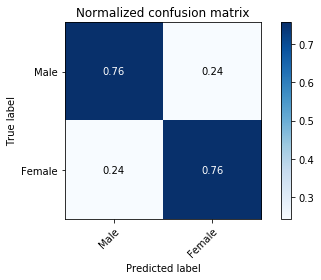

In [15]:
explore_data.plot_confusion_matrix(val_target, val_preds_mlp_ngram, classes, normalize=True)

Confusion matrix, without normalization
[[22896  8462]
 [11770 19588]]
              precision    recall  f1-score   support

        Male       0.66      0.73      0.69     31358
      Female       0.70      0.62      0.66     31358

   micro avg       0.68      0.68      0.68     62716
   macro avg       0.68      0.68      0.68     62716
weighted avg       0.68      0.68      0.68     62716



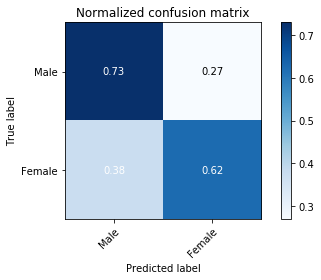

In [16]:
explore_data.plot_confusion_matrix(val_target, val_preds_mlp_use_aggr_chunk, classes, normalize=True)

In [17]:
np.mean(val_target==val_preds_cnn.flatten())

0.735426366477454

Confusion matrix, without normalization
[[22023  9335]
 [ 7258 24100]]
              precision    recall  f1-score   support

        Male       0.75      0.70      0.73     31358
      Female       0.72      0.77      0.74     31358

   micro avg       0.74      0.74      0.74     62716
   macro avg       0.74      0.74      0.74     62716
weighted avg       0.74      0.74      0.74     62716



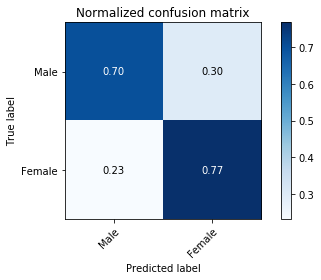

In [18]:
explore_data.plot_confusion_matrix(val_target, val_preds_cnn, classes, normalize=True)

In [19]:
np.mean(val_target==val_preds_cnn_aggr_chunk.flatten())

0.742553734294279

Confusion matrix, without normalization
[[22509  8849]
 [ 7297 24061]]
              precision    recall  f1-score   support

        Male       0.76      0.72      0.74     31358
      Female       0.73      0.77      0.75     31358

   micro avg       0.74      0.74      0.74     62716
   macro avg       0.74      0.74      0.74     62716
weighted avg       0.74      0.74      0.74     62716



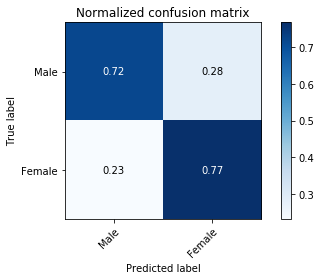

In [20]:
explore_data.plot_confusion_matrix(val_target, val_preds_cnn_aggr_chunk, classes, normalize=True)

Confusion matrix, without normalization
[[20474 10884]
 [ 8951 22407]]
              precision    recall  f1-score   support

        Male       0.70      0.65      0.67     31358
      Female       0.67      0.71      0.69     31358

   micro avg       0.68      0.68      0.68     62716
   macro avg       0.68      0.68      0.68     62716
weighted avg       0.68      0.68      0.68     62716



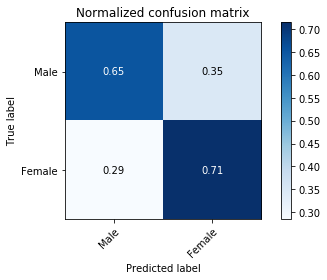

In [21]:
explore_data.plot_confusion_matrix(val_target, val_preds_cnn_use, classes, normalize=True)

Confusion matrix, without normalization
[[22936  8422]
 [ 8575 22783]]
              precision    recall  f1-score   support

        Male       0.73      0.73      0.73     31358
      Female       0.73      0.73      0.73     31358

   micro avg       0.73      0.73      0.73     62716
   macro avg       0.73      0.73      0.73     62716
weighted avg       0.73      0.73      0.73     62716



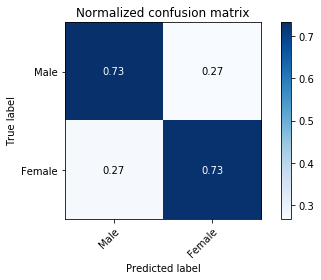

In [22]:
explore_data.plot_confusion_matrix(val_target, val_preds_sep, classes, normalize=True)

In [23]:
model_types = [
    (val_pred_probs_mlp_ngram, 'MLP ngram'),
    (val_pred_probs_mlp_use_aggr_chunk, 'MLP USE'),
    (val_pred_probs_cnn, 'CNN'), 
    (val_pred_probs_cnn_aggr_chunk, 'CNN chunk'),
    (val_pred_probs_cnn_use, 'CNN USE'),
    (val_pred_probs_sep, 'sepCNN')
]

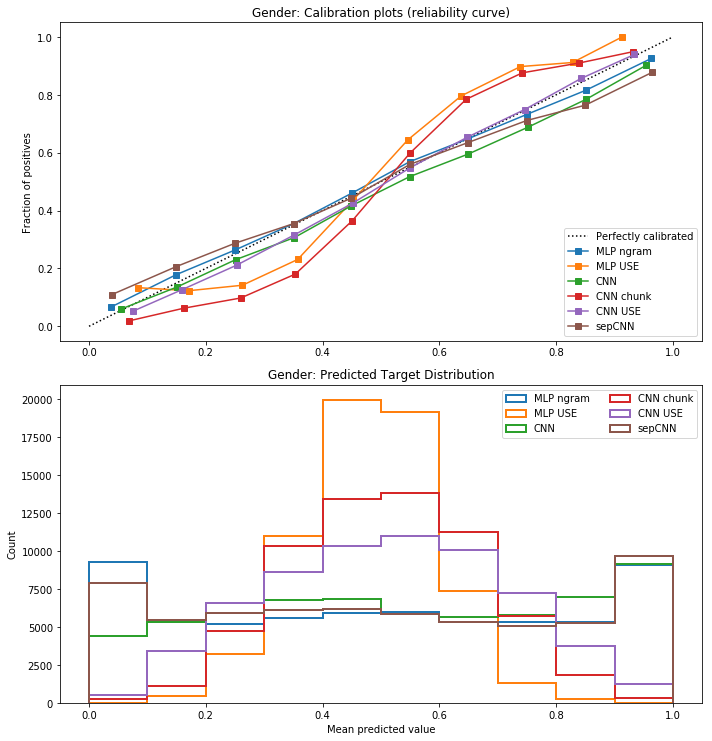

In [24]:
reload(explore_data)
explore_data.plot_compare_calibration_curves(val_target, model_types, 'Gender')

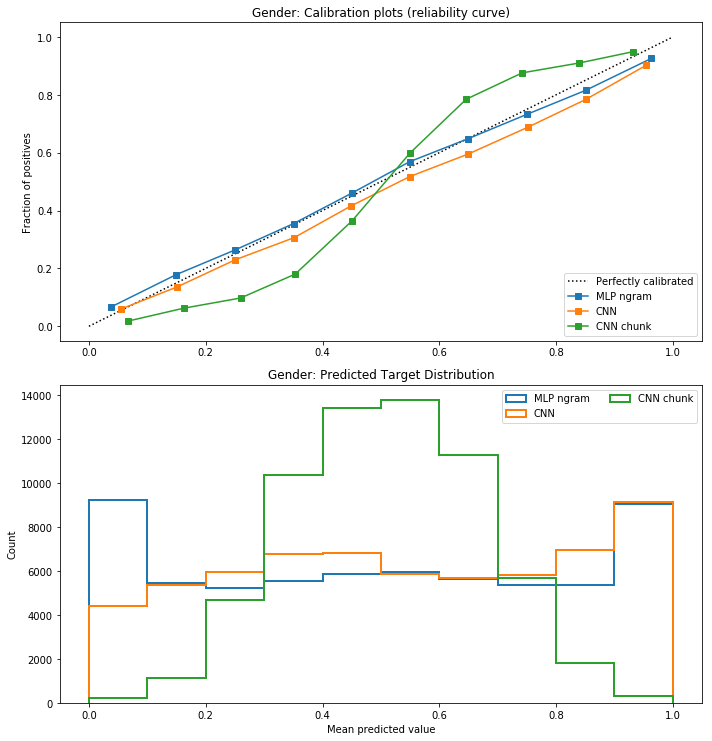

In [25]:
model_types = [
    (val_pred_probs_mlp_ngram, 'MLP ngram'),
    (val_pred_probs_cnn, 'CNN'), 
    (val_pred_probs_cnn_aggr_chunk, 'CNN chunk')
]
explore_data.plot_compare_calibration_curves(val_target, model_types, 'Gender')

Confusion matrix, without normalization
[[24020  7336]
 [ 5261 26099]]
              precision    recall  f1-score   support

        Male       0.82      0.77      0.79     31356
      Female       0.78      0.83      0.81     31360

   micro avg       0.80      0.80      0.80     62716
   macro avg       0.80      0.80      0.80     62716
weighted avg       0.80      0.80      0.80     62716



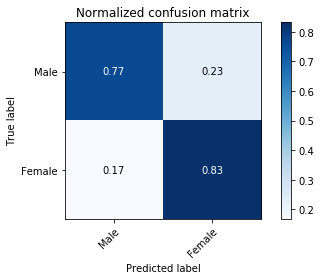

In [26]:
explore_data.plot_confusion_matrix(val_preds_mlp_ngram, val_preds_cnn, classes, normalize=True)

### Merging predictions with descriptions

In [27]:
descr_df = pd.read_csv(main_dir+'final-project/data/QA/full_descr.txt', sep="|", index_col=0)
descr_df = descr_df.loc[np.asarray(val_ids, dtype=int)]
descr_df.reset_index(inplace=True)
descr_df.shape

/usr/local/lib/python3.5/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(62716, 17)

In [28]:
pred_df = pd.DataFrame({'ids': np.asarray(val_ids, dtype=np.int64), 
                        'pred_probs_mlp_ngram': val_pred_probs_mlp_ngram.flatten(), 
                        'pred_probs_mlp_use': val_pred_probs_mlp_use_aggr_chunk.flatten(), 
                        'pred_probs_cnn': val_pred_probs_cnn.flatten(),
                        'pred_probs_cnn_chunk': val_pred_probs_cnn_aggr_chunk.flatten(),
                        'pred_probs_cnn_use': val_pred_probs_cnn_use.flatten(),
                        'pred_probs_sep': val_pred_probs_sep.flatten()})
pred_df.shape

(62716, 7)

In [29]:
descr_pred_df = descr_df.merge(pred_df, left_on='speech_id', right_on='ids')
descr_pred_df.shape

(62716, 24)

In [30]:
descr_pred_df.head()

,speech_id,date,char_count,word_count,speakerid,Party,Congress,Chamber,State,Ethnicity,...,speaker,Full Name,match,ids,pred_probs_cnn,pred_probs_cnn_chunk,pred_probs_cnn_use,pred_probs_mlp_ngram,pred_probs_mlp_use,pred_probs_sep
0,1080099024,20031030,436,70,108118820.0,D,108,H,CA,W,...,Mrs. CAPPS,"CAPPS, LOIS",fuzzy,1080099024,0.385807,0.577375,0.609537,0.724416,0.587049,0.629989
1,1080165561,20040625,6213,1056,108120190.0,D,108,H,CA,B,...,Ms. LEE,"LEE, BARBARA",fuzzy,1080165561,0.889116,0.542140,0.710215,0.237109,0.616921,0.733058
2,1090156218,20060711,1230,198,109116060.0,D,109,H,CA,H,...,Ms. SOLIS,"SOLIS, HILDA",exact,1090156218,0.950747,0.773324,0.959096,0.981613,0.725295,0.882182
3,1060121740,20000315,700,136,106117690.0,D,106,H,NY,W,...,Mrs. McCARTHY of New York,"MCCARTHY, CAROLYN",exact,1060121740,0.881191,0.627593,0.732315,0.797693,0.611563,0.772252
4,1100177577,20080623,3302,490,110114720.0,R,110,H,VA,W,...,Mrs. DRAKE,"DRAKE, THELMA",exact,1100177577,0.520997,0.527163,0.696529,0.452258,0.509501,0.522985


In [31]:
preds = [
    'pred_probs_mlp_ngram',
    'pred_probs_mlp_use',
    'pred_probs_cnn', 
    'pred_probs_cnn_chunk',
    'pred_probs_cnn_use',
    'pred_probs_sep'
]

In [32]:
descr_pred_df[preds+['Female']].groupby('Female').mean()

,pred_probs_mlp_ngram,pred_probs_mlp_use,pred_probs_cnn,pred_probs_cnn_chunk,pred_probs_cnn_use,pred_probs_sep
Female,,,,,,
0.0,0.314101,0.434135,0.382634,0.425101,0.426884,0.345091
1.0,0.683733,0.529064,0.697827,0.596889,0.600667,0.668697


In [33]:
preds_combo = []
for i in range(1, len(preds)+1):
    preds_combo.extend(list(itertools.combinations(preds, i)))
len(preds_combo)

63

In [34]:
preds_combo_results = []
for i in range(len(preds_combo)):
    temp = descr_pred_df[list(preds_combo[i])]
    avg = temp.mean(axis=1)
    avg_pred = avg > 0.5
    result = np.mean(avg_pred==descr_pred_df['Female'])
    preds_combo_results.append((preds_combo[i], result))

In [35]:
preds_combo_results = sorted(preds_combo_results, key=lambda x: -x[1])

In [36]:
preds_combo_results[0]

(('pred_probs_mlp_ngram', 'pred_probs_cnn', 'pred_probs_cnn_chunk'),
 0.765928949550354)

In [37]:
descr_pred_df['pred_probs_combo'] = descr_pred_df[list(preds_combo_results[0][0])].mean(axis=1)
descr_pred_df['pred_combo'] = descr_pred_df['pred_probs_combo'] > 0.5
np.mean(val_target==descr_pred_df['pred_combo'].values.flatten())

0.765928949550354

### Save the main dataframe

In [38]:
keep_cols = ['speech_id',
 'date',
 'char_count',
 'word_count',
 'speakerid',
 'Party',
 'Congress',
 'Chamber',
 'State',
 'Ethnicity',
 'Age',
 'Age_lt_med',
 'NonWhite',
 'Female',
 'speaker',
 'Full Name',
 'match',
 'ids',
 'pred_probs_combo',
 'pred_combo']

In [39]:
descr_pred_df[keep_cols].to_pickle(os.path.join(probs_path, 'gender_preds.pkl'))

### Evaluating final predictions

Confusion matrix, without normalization
[[23368  7990]
 [ 6690 24668]]
              precision    recall  f1-score   support

        Male       0.78      0.75      0.76     31358
      Female       0.76      0.79      0.77     31358

   micro avg       0.77      0.77      0.77     62716
   macro avg       0.77      0.77      0.77     62716
weighted avg       0.77      0.77      0.77     62716



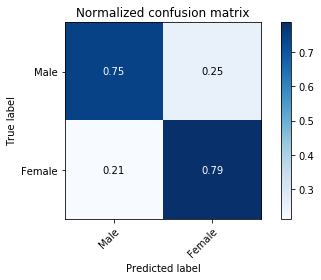

In [40]:
explore_data.plot_confusion_matrix(val_target, descr_pred_df['pred_combo'], classes, normalize=True)

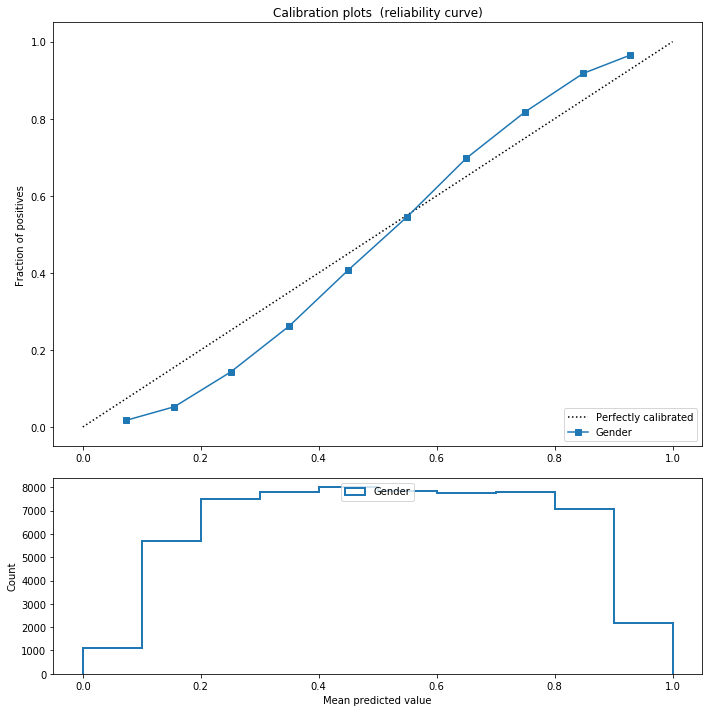

In [41]:
explore_data.plot_calibration_curve(val_target, descr_pred_df['pred_probs_combo'], 'Gender')

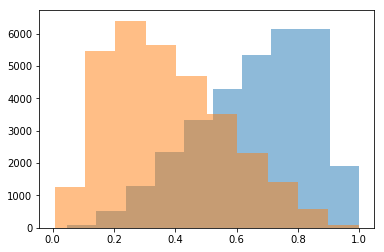

In [155]:
_=plt.hist(descr_pred_df[descr_pred_df.Female==1]['pred_probs_combo'], alpha=0.5)
_=plt.hist(descr_pred_df[descr_pred_df.Female==0]['pred_probs_combo'], alpha=0.5)
plt.show()

In [42]:
reload(explore_data)
# checking the ratios of demo variables in low-mid-high probability buckets
explore_data.check_bin_probs_distr(descr_pred_df['pred_probs_combo'], 
                                   val_ids, 
                                   descr_df.set_index('speech_id'))

Validation sample means:
      Gender_F  Ethinicity_NW     AvgAge   Party_D  Chamber_H  AvgWordCount
base       0.5       0.173991  58.285477  0.621468   0.659816     387.29868


,Gender_F,Ethinicity_NW,AvgAge,Party_D,Chamber_H,AvgWordCount
0.4,0.31,0.62,0.99,0.88,0.91,0.96
0.6,0.95,0.97,1.00,0.99,0.99,1.01
1.0,1.64,1.35,1.01,1.12,1.09,1.03


In [43]:
reload(explore_data)
explore_data.compare_ngrams(val_list, descr_pred_df['pred_probs_combo'], 
                            ngram_range=(1, 1),
                            top_k=20)


Top 20 ngrams by differentiating score:


,ngram,<0.4,<0.6,<1.0,score
0,ensure,2025.0,1925.0,3809.0,98.0
1,california,2394.0,2351.0,4923.0,83.0
2,woman,822.0,977.0,2109.0,67.0
3,proud,1795.0,1647.0,3071.0,65.0
4,unanimous,2502.0,1611.0,1997.0,62.0
5,communities,2145.0,2042.0,3945.0,58.0
6,ought,1700.0,1045.0,963.0,57.0
7,distinguished,2727.0,1674.0,2090.0,56.0
8,access,1876.0,1835.0,3493.0,53.0
9,womens,623.0,803.0,1964.0,53.0


### Adding topics

In [44]:
ldadata_path = main_dir+'final-project/LDA/data/'
all_speeches_topics_df = pd.read_pickle(ldadata_path+'speeches_topics_gender_36')
all_speeches_topics_df.Speech_id = all_speeches_topics_df.Speech_id.astype('int')
all_speeches_topics_df.shape

(62716, 7)

In [45]:
topic_pred_df = descr_pred_df.merge(all_speeches_topics_df, 
                               left_on='speech_id',
                               right_on='Speech_id')
topic_pred_df.shape

(62716, 33)

In [46]:
topic_names = pd.read_csv(os.path.join(ldadata_path, 'gender_topics.txt'), sep="|", header=None, names=["Prim_Topic", "Prim_Topic_Name"])

In [47]:
topic_pred_df = topic_pred_df.merge(topic_names, on='Prim_Topic')

## Congressperson level analysis

In [48]:
speaker_df = topic_pred_df[['Full Name', 'Party', 'State', 'Female', 'NonWhite', 'Age', 'pred_probs_combo', 'speech_id', 'Topic_Count']]\
                .groupby(['Full Name', 'Party', 'State', 'Female', 'NonWhite'])\
                .agg({'pred_probs_combo':['mean'], 'Age': ['mean'], 'speech_id': ['count'], 'Topic_Count': ['mean']})
speaker_df.columns = ['_'.join(col) for col in speaker_df.columns]
speaker_df.reset_index(inplace=True)
speaker_df['Female_pred'] = speaker_df.pred_probs_combo_mean > 0.5
speaker_df.shape

(1702, 10)

In [49]:
speaker_df.Female.mean()

0.13043478260869565

In [50]:
speaker_df.head()

,Full Name,Party,State,Female,NonWhite,pred_probs_combo_mean,Topic_Count_mean,speech_id_count,Age_mean,Female_pred
0,"ABDNOR, JAMES",R,SD,0.0,1.0,0.368085,7.473684,19,61.842105,False
1,"ABERCROMBIE, NEIL",D,HI,0.0,0.0,0.338285,7.653846,26,61.000000,False
2,"ABRAHAM, RALPH",R,LA,0.0,0.0,0.583289,9.000000,1,62.000000,True
3,"ABRAHAM, SPENCER",R,MI,0.0,1.0,0.465042,8.181818,33,46.000000,False
4,"ACEVEDO-VILA, ANIBAL",A,PR,0.0,1.0,0.661028,13.000000,1,40.000000,True


In [51]:
np.mean(speaker_df.Female==speaker_df.Female_pred)

0.9400705052878966

In [52]:
221/222

0.9954954954954955

Confusion matrix, without normalization
[[1379  101]
 [   1  221]]
              precision    recall  f1-score   support

        Male       1.00      0.93      0.96      1480
      Female       0.69      1.00      0.81       222

   micro avg       0.94      0.94      0.94      1702
   macro avg       0.84      0.96      0.89      1702
weighted avg       0.96      0.94      0.94      1702



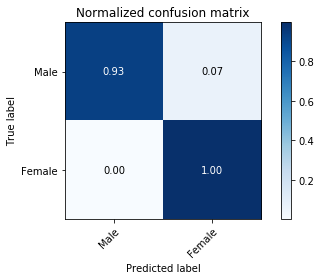

In [53]:
explore_data.plot_confusion_matrix(speaker_df.Female, speaker_df.Female_pred, classes, normalize=True)

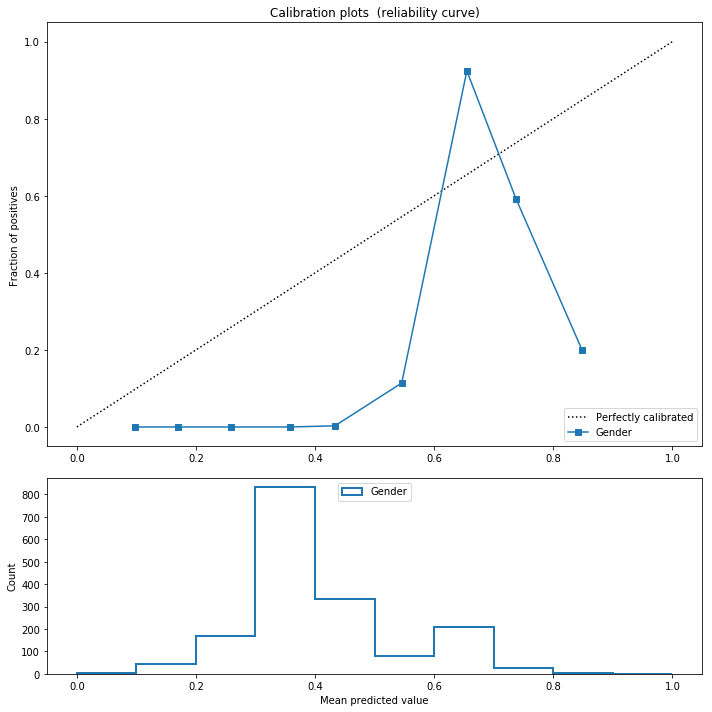

In [54]:
explore_data.plot_calibration_curve(speaker_df.Female, speaker_df['pred_probs_combo_mean'], 'Gender')

In [159]:
list(speaker_df)

['Full Name',
 'Party',
 'State',
 'Female',
 'NonWhite',
 'pred_probs_combo_mean',
 'Topic_Count_mean',
 'speech_id_count',
 'Age_mean',
 'Female_pred']

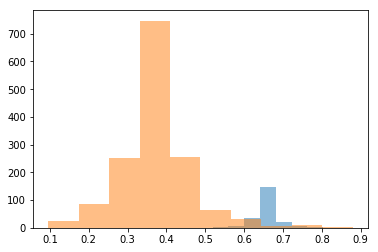

In [163]:
_=plt.hist(speaker_df[speaker_df.Female==1]['pred_probs_combo_mean'], alpha=0.5)
_=plt.hist(speaker_df[speaker_df.Female==0]['pred_probs_combo_mean'], alpha=0.5)
plt.show()

In [165]:
speaker_df.speech_id_count.median()

12.0

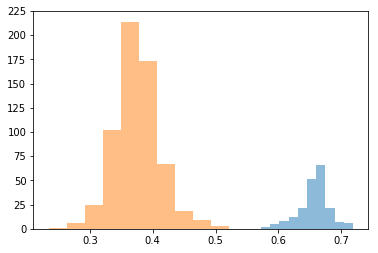

In [166]:
_=plt.hist(speaker_df[(speaker_df.Female==1) & (speaker_df.speech_id_count>speaker_df.speech_id_count.median())]['pred_probs_combo_mean'], alpha=0.5)
_=plt.hist(speaker_df[(speaker_df.Female==0) & (speaker_df.speech_id_count>speaker_df.speech_id_count.median())]['pred_probs_combo_mean'], alpha=0.5)
plt.show()

#### Checking misclassifications

In [55]:
speaker_df[(speaker_df.Female==1) & (speaker_df.Female_pred==0)].sort_values(by='pred_probs_combo_mean', ascending=False)

,Full Name,Party,State,Female,NonWhite,pred_probs_combo_mean,Topic_Count_mean,speech_id_count,Age_mean,Female_pred
36,"ASHBROOK, JEAN",R,OH,1.0,0.0,0.437581,6.0,2,48.0,False


In [56]:
topic_pred_df[topic_pred_df['Full Name']=='ASHBROOK, JEAN']

,speech_id,date,char_count,word_count,speakerid,Party,Congress,Chamber,State,Ethnicity,...,pred_probs_combo,pred_combo,Topic_Count,Prim_Topic,Prim_Topic_Contrib,Prim_Topic_Keywords,Sec_Topic,Sec_Topic_Contrib,Speech_id,Prim_Topic_Name
1547,970261094,19821209,514,86,97105580.0,R,97,H,OH,W,...,0.276391,False,6.0,35.0,0.6,"history,great,nation,day,american,live,first,w...",10.0,0.14,970261094,Great Nation
18902,970259753,19821208,1037,185,97105580.0,R,97,H,OH,W,...,0.598770,True,6.0,24.0,0.4,"serve,service,family,honor,dr,member,life,care...",32.0,0.17,970259753,Positive Words 2


In [57]:
val_list[val_ids.index('970261094')]

'Mr. Speaker. today December 9. 1982. marks the 300th anniversary of the arrival of the Ashbrook family on the continent of North America. On December 9. 1682. the familys first American. John Ashbrook. landed in Pennsylvania. having sailed from Belfast. Ireland. on the good ship Antelope. Today the descendents of John Ashbrook are observing the tricentennial of his arrival with solemn thanks for the bounty of the land to which he came and a firm resolve to cherish and defend the freedom they have found here.e'

In [58]:
val_list[val_ids.index('970259753')]

'Mr. Speaker. I would like to take this opportunity to pay tribute to a true friend and dear colleague. JOHN ROUSSELOT. I first met Mr. RoUSSELOT many years ago. when I had come to Washington with my husband. John A. When I was elected to Congress last summer. he was quick to offer any assistance he could in helping me learn my way around. and I could always turn to JOHN for advice. His activities and interests are very diverse. From the Congressional Balanced Budget Caucus to the Coalition of Peace Through Strength. JOHN RousSELOT showed his dedication and devotion to the constituents he so ably served. I admire his consistency in fighting excess Government spending and his interest in fiscal responsibility. JOHN RousSELOT is a hardworking. Intelligent man and I would like to wish him much success in the future. I also would like to say what a loss to this Congress it is to say goodby to BoB DoRNAN. a very special friend of John Ashbrooks. BoB DORNAN is a great American. and Boa. I wi

In [59]:
speaker_df[(speaker_df.Female==0) & (speaker_df.Female_pred==1)].speech_id_count.value_counts()

1     37
2     26
4     10
5      6
10     5
3      5
9      4
8      2
7      2
6      2
17     1
16     1
Name: speech_id_count, dtype: int64

In [60]:
speaker_df[(speaker_df.Female==0) & (speaker_df.Female_pred==1)].sort_values(by='pred_probs_combo_mean', ascending=False).head()

,Full Name,Party,State,Female,NonWhite,pred_probs_combo_mean,Topic_Count_mean,speech_id_count,Age_mean,Female_pred
61,"BARBER, RON",D,AZ,0.0,0.0,0.879352,10.0,1,69.0,True
351,"COYNE, JAMES",R,PA,0.0,0.0,0.871595,5.0,1,36.0,True
260,"CASE, ED",D,HI,0.0,0.0,0.836456,6.0,1,54.0,True
1196,"OWENS, WILLIAM",D,NY,0.0,0.0,0.810312,13.0,1,61.0,True
601,"GIBSON, CHRISTOPHER",R,NY,0.0,0.0,0.792434,8.0,1,50.0,True


In [61]:
descr_pred_df[descr_pred_df['Full Name']=='BARBER, RON'].speech_id

44916    1130045661
Name: speech_id, dtype: int64

In [62]:
val_list[val_ids.index('1130045661')]

'Mr. Speaker. I rise today to honor the Tragedy Assistance Program for Survivors. The Tragedy Assistance Program for Survivors or TAPS assists families of our Armed Forces who have lost their military loved one. TAPS is a resource that provides 24/7 tragedy assistance based on a framework of peertopeer emotional support. Their programs fill the crucial need of connecting survivors with survivors to provide comfort. compassion. healing and hope in time of need. For nearly 20 years. TAPS has provided essential support to more than 40.000 military family members and those assisting them. TAPS successfully builds on the experience of survivors by connecting them as peermentors to other grieving family members in similar circumstances. However. connecting survivors is just the beginning. TAPS continues its outreach and support through grief seminars. camps for kids and physical events. The TAPS network in not a onetime liaison but a continuing support framework that provides continuous comp

In [63]:
keep_cols = [
    'date',
    'word_count',
    'Party',
    'Congress',
    'Chamber',
    'State',
    'Ethnicity',
    'Age',
    'Female',
    'Full Name',
    'pred_probs_mlp_ngram',
    'pred_probs_cnn',
    'pred_probs_cnn_chunk',
    'pred_probs_combo',
    'Prim_Topic',
    'Prim_Topic_Contrib',
    'Sec_Topic',
    'Sec_Topic_Contrib',
]

In [64]:
topic_pred_df[keep_cols][topic_pred_df['Full Name']=='BARBER, RON'].T

,4334
date,20130911
word_count,237
Party,D
Congress,113
Chamber,H
State,AZ
Ethnicity,W
Age,69
Female,0
Full Name,"BARBER, RON"


In [65]:
speaker_df[['pred_probs_combo_mean','Female','Female_pred', 'Full Name', 'speech_id_count']]\
            .groupby(['Female','Female_pred'])\
            .agg({'pred_probs_combo_mean': ['min','mean','max'],
                  'Full Name': ['count'],
                  'speech_id_count': ['sum']})

speech_id_count pred_probs_combo_mean                      \
                               sum                   min      mean       max   
Female Female_pred                                                             
0.0    False                 31023              0.095770  0.357923  0.499647   
       True                    335              0.502026  0.591057  0.879352   
1.0    False                     2              0.437581  0.437581  0.437581   
       True                  31356              0.533466  0.659479  0.844141   

                   Full Name  
                       count  
Female Female_pred            
0.0    False            1379  
       True              101  
1.0    False               1  
       True              221

### Checking individual cases

In [66]:
speaker_df.speech_id_count.median()

12.0

In [67]:
speaker_med_df = speaker_df[speaker_df.speech_id_count > speaker_df.speech_id_count.median()]
speaker_med_df.shape

(818, 10)

In [68]:
tp = np.argmax(speaker_med_df[speaker_med_df.Female==1].pred_probs_combo_mean.values)
speaker_med_df[speaker_med_df.Female==1].iloc[tp]

Full Name                DAHLKEMPER, KATHLEEN
Party                                       D
State                                      PA
Female                                      1
NonWhite                                    0
pred_probs_combo_mean                0.718371
Topic_Count_mean                      6.88462
speech_id_count                            26
Age_mean                                   53
Female_pred                              True
Name: 374, dtype: object

In [69]:
tn = np.argmin(speaker_med_df[speaker_med_df.Female==0].pred_probs_combo_mean.values)
speaker_med_df[speaker_med_df.Female==0].iloc[tn]

Full Name                COMBEST, LARRY
Party                                 R
State                                TX
Female                                0
NonWhite                              0
pred_probs_combo_mean          0.234317
Topic_Count_mean                6.64286
speech_id_count                      14
Age_mean                        51.5714
Female_pred                       False
Name: 320, dtype: object

In [70]:
fp = np.argmax(speaker_med_df[speaker_med_df.Female==0].pred_probs_combo_mean.values)
speaker_med_df[speaker_med_df.Female==0].iloc[fp]

Full Name                MANZULLO, DONALD
Party                                   R
State                                  IL
Female                                  0
NonWhite                                0
pred_probs_combo_mean            0.521895
Topic_Count_mean                  7.94118
speech_id_count                        17
Age_mean                          61.2941
Female_pred                          True
Name: 1000, dtype: object

In [71]:
fn = np.argmin(speaker_med_df[speaker_med_df.Female==1].pred_probs_combo_mean.values)
speaker_med_df[speaker_med_df.Female==1].iloc[fn]

Full Name                HALVORSON, DEBORAH
Party                                     D
State                                    IL
Female                                    1
NonWhite                                  0
pred_probs_combo_mean              0.572112
Topic_Count_mean                    7.64706
speech_id_count                          17
Age_mean                                 52
Female_pred                            True
Name: 672, dtype: object

### Topic analysis of individual cases

In [72]:
topic_share = topic_pred_df[['Prim_Topic_Name', 'speech_id']].groupby('Prim_Topic_Name').count() / topic_pred_df.shape[0]
topic_share.columns = ['topic_share']
topic_share.reset_index(inplace=True)
topic_share.shape

(36, 2)

In [73]:
topic_spkr_count = topic_pred_df[['Full Name', 'Party', 'State', 'Prim_Topic_Name']]\
                            .groupby(['Full Name', 'Party', 'State'])\
                            .Prim_Topic_Name.nunique()\
                            .reset_index()
topic_spkr_count.rename(columns={"Prim_Topic_Name": "Unique_Prim_Topic_count"}, inplace=True)
topic_spkr_count.shape

(1702, 4)

In [74]:
topic_pred_df.shape

(62716, 34)

In [75]:
topic_spkr_count.shape

(1702, 4)

In [76]:
speaker_topic_share = topic_pred_df[['Full Name', 'Party', 'State', 'Prim_Topic_Name', 'speech_id', 'pred_probs_combo']]\
                            .groupby(['Full Name', 'Party', 'State', 'Prim_Topic_Name'])\
                            .agg({'speech_id': ['count'], 'pred_probs_combo': ['mean']})
speaker_topic_share.columns = ['_'.join(col) for col in speaker_topic_share.columns]
speaker_topic_share.reset_index(inplace=True)
speaker_topic_share.rename(columns={'pred_probs_combo_mean': 'speech_avg_prob', 'speech_id_count': 'Speech_cnt_spkr_by_topic'}, inplace=True)
speaker_topic_share = speaker_topic_share.merge(speaker_df, on=['Full Name', 'Party', 'State'])\
                                         .merge(topic_share, on='Prim_Topic_Name')\
                                         .merge(topic_spkr_count, on=['Full Name', 'Party', 'State'])
speaker_topic_share['topic_speaker_share'] = speaker_topic_share.Speech_cnt_spkr_by_topic/speaker_topic_share.speech_id_count
speaker_topic_share['topic_share_index'] = speaker_topic_share.topic_speaker_share/speaker_topic_share.topic_share
speaker_topic_share.shape

(16644, 17)

In [77]:
speaker_topic_share[speaker_topic_share['Full Name']=='DAHLKEMPER, KATHLEEN'].Speech_cnt_spkr_by_topic.sum()

26

In [78]:
speaker_topic_share[speaker_topic_share['Full Name']=='DAHLKEMPER, KATHLEEN'].sort_values(by='speech_avg_prob', ascending=False).head()

,Full Name,Party,State,Prim_Topic_Name,speech_avg_prob,Speech_cnt_spkr_by_topic,Female,NonWhite,pred_probs_combo_mean,Topic_Count_mean,speech_id_count,Age_mean,Female_pred,topic_share,Unique_Prim_Topic_count,topic_speaker_share,topic_share_index
2289,"DAHLKEMPER, KATHLEEN",D,PA,Economy,0.905084,6,1.0,0.0,0.718371,6.884615,26,53.0,True,0.023248,12,0.230769,9.926559
2299,"DAHLKEMPER, KATHLEEN",D,PA,Finance and Business,0.875510,1,1.0,0.0,0.718371,6.884615,26,53.0,True,0.010412,12,0.038462,3.693957
2295,"DAHLKEMPER, KATHLEEN",D,PA,Foreign Policy,0.762827,1,1.0,0.0,0.718371,6.884615,26,53.0,True,0.027377,12,0.038462,1.404865
2288,"DAHLKEMPER, KATHLEEN",D,PA,Budgets and Spending,0.732626,2,1.0,0.0,0.718371,6.884615,26,53.0,True,0.038347,12,0.076923,2.005949
2291,"DAHLKEMPER, KATHLEEN",D,PA,Random Verbs 2,0.713979,3,1.0,0.0,0.718371,6.884615,26,53.0,True,0.150424,12,0.115385,0.767062


In [79]:
speaker_topic_share[speaker_topic_share['Full Name']=='MANZULLO, DONALD'].sort_values(by='speech_avg_prob', ascending=False).head()

,Full Name,Party,State,Prim_Topic_Name,speech_avg_prob,Speech_cnt_spkr_by_topic,Female,NonWhite,pred_probs_combo_mean,Topic_Count_mean,speech_id_count,Age_mean,Female_pred,topic_share,Unique_Prim_Topic_count,topic_speaker_share,topic_share_index
15732,"MANZULLO, DONALD",R,IL,Taxes and Welfare,0.896914,1,0.0,0.0,0.521895,7.941176,17,61.294118,True,0.025608,11,0.058824,2.297121
15735,"MANZULLO, DONALD",R,IL,Positive Words 2,0.762351,1,0.0,0.0,0.521895,7.941176,17,61.294118,True,0.053798,11,0.058824,1.093413
15731,"MANZULLO, DONALD",R,IL,Random Verbs 2,0.704511,1,0.0,0.0,0.521895,7.941176,17,61.294118,True,0.150424,11,0.058824,0.391051
15733,"MANZULLO, DONALD",R,IL,Diplomacy and Security,0.615456,1,0.0,0.0,0.521895,7.941176,17,61.294118,True,0.031252,11,0.058824,1.882233
15738,"MANZULLO, DONALD",R,IL,Judicial Nominations,0.596264,2,0.0,0.0,0.521895,7.941176,17,61.294118,True,0.013968,11,0.117647,8.422777


In [80]:
topic_share = topic_pred_df[['Prim_Topic_Name', 'speech_id']].groupby('Prim_Topic_Name').count() / topic_pred_df.shape[0]
topic_share.columns = ['topic_share']
topic_share.reset_index(inplace=True)
topic_share.shape

(36, 2)

In [81]:
pred_share = topic_pred_df[['Female', 'pred_combo', 'speech_id']]\
                    .groupby(['Female', 'pred_combo'])\
                    .count()\
                    .reset_index()
pred_share.rename(columns = {'speech_id': 'pred_speech_cnt'}, inplace=True)
pred_share

,Female,pred_combo,pred_speech_cnt
0,0.0,False,23368
1,0.0,True,7990
2,1.0,False,6690
3,1.0,True,24668


In [82]:
topic_pred_share = topic_pred_df[['Prim_Topic_Name', 'Female', 'pred_combo', 'speech_id']]\
                    .groupby(['Prim_Topic_Name', 'Female', 'pred_combo'])\
                    .count()\
                    .reset_index()
topic_pred_share.rename(columns = {'speech_id': 'topic_pred_speech_cnt'}, inplace=True)
topic_pred_share = topic_pred_share.merge(topic_share, on='Prim_Topic_Name').merge(pred_share, on=['Female', 'pred_combo'])
topic_pred_share['topic_pred_share'] = topic_pred_share.topic_pred_speech_cnt/topic_pred_share.pred_speech_cnt
topic_pred_share['topic_pred_share_index'] = topic_pred_share.topic_pred_share/topic_pred_share.topic_share
topic_pred_share.shape

(144, 8)

In [83]:
topic_pred_share[(topic_pred_share.Female==1) & (topic_pred_share.pred_combo==1)].sort_values(by='topic_pred_share_index', ascending=False).head()

,Prim_Topic_Name,Female,pred_combo,topic_pred_speech_cnt,topic_share,pred_speech_cnt,topic_pred_share,topic_pred_share_index
126,Healthcare and Women's Health,1.0,True,568,0.014223,24668,0.023026,1.618929
136,Poverty and Welfare,1.0,True,255,0.006521,24668,0.010337,1.585117
116,Economy,1.0,True,813,0.023248,24668,0.032958,1.417677
110,Children's Diseases,1.0,True,822,0.023582,24668,0.033323,1.413019
117,Education,1.0,True,660,0.020091,24668,0.026755,1.331735


In [84]:
topic_pred_share[(topic_pred_share.Female==0) & (topic_pred_share.pred_combo==0)].sort_values(by='topic_pred_share_index', ascending=False).head()

,Prim_Topic_Name,Female,pred_combo,topic_pred_speech_cnt,topic_share,pred_speech_cnt,topic_pred_share,topic_pred_share_index
5,Costs,0.0,False,397,0.012294,23368,0.016989,1.381952
4,Common Phrases,0.0,False,2023,0.065023,23368,0.086571,1.331391
7,Diplomacy and Security,0.0,False,909,0.031252,23368,0.038899,1.244700
22,Legislation,0.0,False,1788,0.063540,23368,0.076515,1.204193
3,Common Congressional Phrases,0.0,False,2673,0.095781,23368,0.114387,1.194258


In [85]:
topic_pred_share[(topic_pred_share.Female==0) & (topic_pred_share.pred_combo==1)].sort_values(by='topic_pred_share_index', ascending=False).head()

,Prim_Topic_Name,Female,pred_combo,topic_pred_speech_cnt,topic_share,pred_speech_cnt,topic_pred_share,topic_pred_share_index
40,Common Phrases,0.0,True,695,0.065023,7990,0.086984,1.337732
68,States,0.0,True,13,0.001244,7990,0.001627,1.308219
41,Costs,0.0,True,127,0.012294,7990,0.015895,1.292948
43,Diplomacy and Security,0.0,True,306,0.031252,7990,0.038298,1.225454
39,Common Congressional Phrases,0.0,True,899,0.095781,7990,0.112516,1.174718


In [86]:
topic_pred_share[(topic_pred_share.Female==1) & (topic_pred_share.pred_combo==0)].sort_values(by='topic_pred_share_index', ascending=False).head()

,Prim_Topic_Name,Female,pred_combo,topic_pred_speech_cnt,topic_share,pred_speech_cnt,topic_pred_share,topic_pred_share_index
90,Healthcare and Women's Health,1.0,False,148,0.014223,6690,0.022123,1.555425
74,Children's Diseases,1.0,False,232,0.023582,6690,0.034679,1.470524
80,Economy,1.0,False,213,0.023248,6690,0.031839,1.369539
81,Education,1.0,False,183,0.020091,6690,0.027354,1.361547
97,Natural Disasters,1.0,False,85,0.009551,6690,0.012706,1.330284


## Congress level analysis

In [87]:
congress_df = descr_pred_df[['Congress', 'Female', 'pred_probs_combo', 'pred_combo']]\
                .groupby('Congress')\
                .agg({'Female': ['mean', 'sum'], 'pred_combo': ['mean']})\
                .reset_index()
congress_df.columns = ['_'.join(col) for col in congress_df.columns]
congress_df['Prediction_balance'] = congress_df.pred_combo_mean / congress_df.Female_mean
congress_df.shape

(18, 5)

In [88]:
congress_df.head()

,Congress_,Female_mean,Female_sum,pred_combo_mean,Prediction_balance
0,97,0.180764,530.0,0.350273,1.937736
1,98,0.220996,661.0,0.373788,1.691377
2,99,0.244430,757.0,0.388440,1.589168
3,100,0.224104,675.0,0.368526,1.644444
4,101,0.293460,866.0,0.410708,1.399538


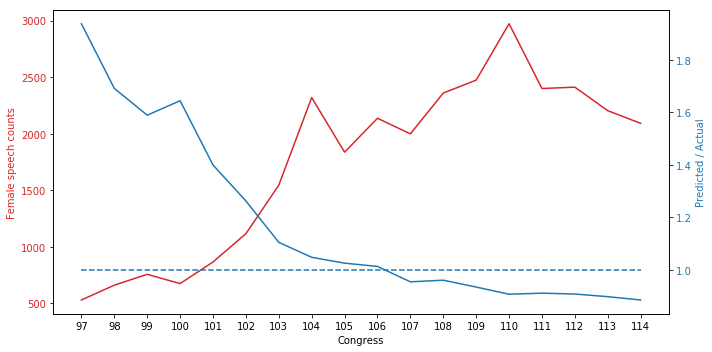

In [89]:
fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:red'
ax1.set_xlabel('Congress')
ax1.set_ylabel('Female speech counts', color=color)
ax1.plot(congress_df.Congress_, congress_df.Female_sum, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Predicted / Actual', color=color)  # we already handled the x-label with ax1
ax2.plot(congress_df.Congress_, congress_df.Prediction_balance, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax2.hlines(y=1,xmin=97,xmax=114, color=color, linestyles='dashed')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xticks(range(97,115))
plt.show()

## Error Analysis

In [90]:
ttl_mispred = descr_pred_df[(descr_pred_df.Female==1) & (descr_pred_df.pred_combo==0)].shape[0] + descr_pred_df[(descr_pred_df.Female==0) & (descr_pred_df.pred_combo==1)].shape[0]
ttl_mispred

14680

In [91]:
false_positives = descr_pred_df[(descr_pred_df.Female==0) & (descr_pred_df.pred_combo==1)]
false_positives.pred_probs_combo.describe()

count    7990.000000
mean        0.636055
std         0.101263
min         0.500014
25%         0.552202
50%         0.615498
75%         0.703896
max         0.998408
Name: pred_probs_combo, dtype: float64

In [92]:
fp_binned = np.digitize(false_positives.pred_probs_combo, [0.5, 0.60, 1])
np.unique(fp_binned, return_counts=True)

(array([1, 2]), array([3560, 4430]))

In [93]:
np.unique(fp_binned, return_counts=True)[1]/ttl_mispred

array([0.24250681, 0.30177112])

In [94]:
false_negatives = descr_pred_df[(descr_pred_df.Female==1) & (descr_pred_df.pred_combo==0)]
false_negatives.pred_probs_combo.describe()

count    6690.000000
mean        0.377828
std         0.091118
min         0.047151
25%         0.318620
50%         0.396254
75%         0.453358
max         0.499965
Name: pred_probs_combo, dtype: float64

In [95]:
fn_binned = np.digitize(false_negatives.pred_probs_combo, [0, 0.4, 0.5])
np.unique(fn_binned, return_counts=True)

(array([1, 2]), array([3425, 3265]))

In [96]:
np.unique(fn_binned, return_counts=True)[1]/ttl_mispred

array([0.23331063, 0.22241144])

In [97]:
# check sum
np.sum(np.unique(fp_binned, return_counts=True)[1] + np.unique(fn_binned, return_counts=True)[1]) - ttl_mispred

0

In [98]:
confusion = descr_pred_df[(descr_pred_df.pred_probs_combo>0.4) & (descr_pred_df.pred_probs_combo<0.6)]
confusion.shape

(15853, 26)

In [99]:
pred_mlp_ngram = list((confusion.pred_probs_mlp_ngram > 0.5) == confusion.Female)
pred_cnn = list((confusion.pred_probs_cnn > 0.5) == confusion.Female)
pred_cnn_chunk = list((confusion.pred_probs_cnn_chunk > 0.5) == confusion.Female)
sum(pred_mlp_ngram), sum(pred_cnn), sum(pred_cnn_chunk)

(8855, 7908, 8455)

In [100]:
consensus = []
for i in range(confusion.shape[0]):
    if (pred_mlp_ngram[i]==True and pred_cnn[i]==True and pred_cnn_chunk[i]==True):
        consensus.append(1)
    elif (pred_mlp_ngram[i]==False and pred_cnn[i]==False and pred_cnn_chunk[i]==False):
        consensus.append(1)
    else:
        consensus.append(0)
np.mean(consensus)

0.20134990222670787

In [101]:
consensus.index(1)

6

In [102]:
confusion[['Female']+preds].head(7)

,Female,pred_probs_mlp_ngram,pred_probs_mlp_use,pred_probs_cnn,pred_probs_cnn_chunk,pred_probs_cnn_use,pred_probs_sep
0,1.0,0.724416,0.587049,0.385807,0.577375,0.609537,0.629989
1,1.0,0.237109,0.616921,0.889116,0.542140,0.710215,0.733058
4,1.0,0.452258,0.509501,0.520997,0.527163,0.696529,0.522985
5,1.0,0.550680,0.392311,0.419063,0.498932,0.396969,0.399330
8,1.0,0.557868,0.396796,0.455712,0.447622,0.433873,0.692699
20,1.0,0.651400,0.466639,0.478114,0.575449,0.552587,0.619954
26,1.0,0.508789,0.509676,0.593348,0.612212,0.556947,0.494348


In [103]:
descr_pred_df[(descr_pred_df.Female==1) & (descr_pred_df.pred_combo==1)].word_count.median()

277.5

In [104]:
descr_pred_df[(descr_pred_df.Female==0) & (descr_pred_df.pred_combo==0)].word_count.median()

216.0

In [105]:
descr_pred_df[(descr_pred_df.Female==0) & (descr_pred_df.pred_combo==1)].word_count.median()

223.0

In [106]:
descr_pred_df[(descr_pred_df.Female==1) & (descr_pred_df.pred_combo==0)].word_count.median()

283.5

In [107]:
list(descr_pred_df)

['speech_id',
 'date',
 'char_count',
 'word_count',
 'speakerid',
 'Party',
 'Congress',
 'Chamber',
 'State',
 'Ethnicity',
 'Age',
 'Age_lt_med',
 'NonWhite',
 'Female',
 'speaker',
 'Full Name',
 'match',
 'ids',
 'pred_probs_cnn',
 'pred_probs_cnn_chunk',
 'pred_probs_cnn_use',
 'pred_probs_mlp_ngram',
 'pred_probs_mlp_use',
 'pred_probs_sep',
 'pred_probs_combo',
 'pred_combo']

In [132]:
keep_cols = [
    'speech_id',
    'date',
    'word_count',
    'Party',
    'Congress',
    'Chamber',
    'State',
    'Ethnicity',
    'Age',
    'Female',
    'Full Name',
    'pred_probs_mlp_ngram',
    'pred_probs_cnn',
    'pred_probs_cnn_chunk',
    'pred_probs_combo',
    'Prim_Topic',
    'Prim_Topic_Contrib',
    'Sec_Topic',
    'Sec_Topic_Contrib',
]

In [133]:
topic_pred_df[keep_cols][topic_pred_df.Female==1].sort_values(by='pred_probs_combo', ascending=False).head(5).T

,54350,47249,36542,116,14852
speech_id,970116749,1110109515,1090056985,1140048847,1060066498
date,19811119,20100518,20050719,20150909,19990726
word_count,503,128,83,41,654
Party,R,D,D,D,D
Congress,97,111,109,114,106
Chamber,S,H,S,H,H
State,FL,PA,CA,CA,CA
Ethnicity,W,W,W,H,W
Age,55,53,66,75,60
Female,1,1,1,1,1


In [134]:
topic_pred_df[keep_cols][topic_pred_df.Female==0].sort_values(by='pred_probs_combo', ascending=True).head(5).T

,34596,40412,61333,59945,9976
speech_id,980082402,1060007744,1010037235,980049665,1070154265
date,19830728,19990303,19890621,19830606,20020724
word_count,111,55,275,507,134
Party,R,D,R,D,R
Congress,98,106,101,98,107
Chamber,H,H,H,H,H
State,PA,IL,CA,NJ,CT
Ethnicity,W,W,W,W,W
Age,44,63,49,60,57
Female,0,0,0,0,0


In [135]:
topic_pred_df[keep_cols][topic_pred_df.Female==0].sort_values(by='pred_probs_combo', ascending=False).head(5).T

,45395,41393,3225,17804,25987
speech_id,1000174233,1050197500,1060053005,1030190450,1020110868
date,19880421,19981006,19990629,19940714,19911112
word_count,456,398,138,901,32
Party,R,R,D,D,R
Congress,100,105,106,103,102
Chamber,H,H,H,H,H
State,TN,KS,WA,MN,CA
Ethnicity,W,W,W,W,W
Age,52,49,64,43,40
Female,0,0,0,0,0


In [136]:
topic_pred_df[keep_cols][topic_pred_df.Female==1].sort_values(by='pred_probs_combo', ascending=True).head(5).T

,3956,54160,23305,45999,36532
speech_id,1100121799,1070056308,1080030432,1120099064,1070053677
date,20071205,20010727,20030410,20120419,20010724
word_count,148,206,335,40,36
Party,R,D,D,D,D
Congress,110,107,108,112,107
Chamber,H,H,H,H,H
State,FL,CA,NY,CA,TX
Ethnicity,W,ME,W,W,B
Age,65,60,58,75,52
Female,1,1,1,1,1


### Confusion analysis

#### False positives

In [137]:
val_list[val_ids.index('1100121799')]

'ida. Mr. Speaker. this year I introduced H.R. 92. the Veterans Timely Access to Health Care. Act. H.R. 92 makes a responsible and reasonable commitment to veterans throughout this country. Under the bill. if a veteran cannot get an appointment with a primary care physician within 30 days. that veteran may see a private physician at no additional cost. Unfortunately. the Veterans Affairs Committee refuses to move my bill and allow the House of Representatives to vote on it. This year. I have witnessed the majority leadership use veterans as a political pawn. Theyve held the Military Construction and Veterans appropriations bill.hostage. I wont allow the same thing to happen with veterans access to health care. I ask my colleagues. regardless of their party affiliation. to stand up and protect veterans as they once stood up to protect you. And I ask the leadership to move H.R. 92.'

In [138]:
topic_pred_df[keep_cols][(topic_pred_df.pred_probs_combo>0.6) & (topic_pred_df.Female==0)].sort_values(by='pred_probs_mlp_ngram', ascending=True).head(5)

,speech_id,date,word_count,Party,Congress,Chamber,State,Ethnicity,Age,Female,Full Name,pred_probs_mlp_ngram,pred_probs_cnn,pred_probs_cnn_chunk,pred_probs_combo,Prim_Topic,Prim_Topic_Contrib,Sec_Topic,Sec_Topic_Contrib
61268,1060201319,20001025,94,D,106,H,OH,W,59.0,0.0,"TRAFICANT, JAMES",0.134099,0.995882,0.686402,0.605461,0.0,0.30,4.0,0.26
61782,1020170025,19920602,884,D,102,S,CO,W,53.0,0.0,"WIRTH, TIMOTHY",0.169734,0.959034,0.756901,0.628556,3.0,0.23,13.0,0.20
3114,1060051891,19990624,492,D,106,S,GA,W,58.0,0.0,"CLELAND, J.",0.249273,0.926122,0.639626,0.605007,35.0,0.45,24.0,0.21
43596,1060077739,19990909,208,D,106,H,WA,W,64.0,0.0,"MCDERMOTT, JIM",0.255178,0.923630,0.803795,0.660867,34.0,0.26,16.0,0.23
46752,1080105832,20031112,2443,R,108,S,WY,W,60.0,0.0,"ENZI, MICHAEL",0.276736,0.821695,0.773584,0.624005,5.0,0.36,26.0,0.21


In [139]:
val_list[val_ids.index('1060201319')]

'Mr. Speaker. the Colorado Supreme Court threw out the 5year mandatory prison sentences for rapists and child molesters. Thus. over 100 rapists are now out on the street. Unbelievable. Naturally. many people are up in arms. and who can blame them. If that is not enough to reward criminals. my colleagues. the victims of these creeps were not even notified. Not even notified. Beam me up. Mr. Speaker. The Supreme Court of Colorado needs their heads examined by a proctologist. I yield back all the victims of the Colorado Supreme Court. Think about that.'

In [140]:
topic_pred_df[keep_cols][(topic_pred_df.pred_probs_combo>0.6) & (topic_pred_df.Female==0)].sort_values(by='pred_probs_cnn', ascending=True).head(5)

,speech_id,date,word_count,Party,Congress,Chamber,State,Ethnicity,Age,Female,Full Name,pred_probs_mlp_ngram,pred_probs_cnn,pred_probs_cnn_chunk,pred_probs_combo,Prim_Topic,Prim_Topic_Contrib,Sec_Topic,Sec_Topic_Contrib
11066,1000121202,19871104,1534,D,100,S,HI,AAPIA,64.0,0.0,"INOUYE, DANIEL",0.958832,0.191267,0.657572,0.602557,26.0,0.17,24.0,0.12
52751,1040178631,19960131,189,D,104,S,CT,W,54.0,0.0,"LIEBERMAN, JOSEPH",0.955832,0.250855,0.673884,0.626857,13.0,0.38,35.0,0.22
40364,1010141846,19900418,204,R,101,H,PA,W,48.0,0.0,"WALKER, ROBERT",0.988202,0.251788,0.676907,0.638966,18.0,0.43,26.0,0.40
40920,980012724,19830311,85,R,98,S,TN,W,59.0,0.0,"BAKER, HOWARD",0.971510,0.276476,0.562423,0.603469,18.0,0.44,5.0,0.33
22004,1000260620,19881005,313,R,100,H,NY,W,69.0,0.0,"HORTON, FRANK",0.969847,0.300230,0.609130,0.626403,24.0,0.30,18.0,0.23


In [141]:
val_list[val_ids.index('1040178631')]

'Mr. President. I rise today to honor the Enfield Fire Department on the occasion of their 100th anniversary. For the past 100 years this dedicated group of men and women have strived to ensure the safety of the community of Enfield. CT. Their dedication is evident in their unshakable commitment to self sacrifice for the security of their friends. families. and neighbors. Indeed some have given the ultimate sacrifice. giving their lives while trying to pro.tect their fellow citizens. This organizations dedication and commitment to the town of Enfield can be seen not only through the fire departmnents actions but also in the great confidence and respect the residents of Enfield place upon these men and women. Ordinary men and women asked to perform extraordinary tasks. never asking what was in it for them. The communitys faith in their fire department has not wavered in its first 100 years and will undoubtedly continue through the next century. The Enfield Fire Department has been an im

In [142]:
topic_pred_df[keep_cols][(topic_pred_df.pred_probs_combo>0.6) & (topic_pred_df.Female==0)].sort_values(by='pred_probs_cnn_chunk', ascending=True).head(5)

,speech_id,date,word_count,Party,Congress,Chamber,State,Ethnicity,Age,Female,Full Name,pred_probs_mlp_ngram,pred_probs_cnn,pred_probs_cnn_chunk,pred_probs_combo,Prim_Topic,Prim_Topic_Contrib,Sec_Topic,Sec_Topic_Contrib
11440,1110075725,20091223,122,R,111,S,SD,W,49.0,0.0,"THUNE, JOHN",0.754134,0.759245,0.306289,0.606556,26.0,0.54,32.0,0.20
46576,1000045186,19870527,218,R,100,H,CA,W,55.0,0.0,"DORNAN, ROBERT",0.858805,0.919752,0.368785,0.715781,5.0,0.39,18.0,0.14
9831,990081034,19850909,196,D,99,H,CA,W,44.0,0.0,"COELHO, ANTHONY",0.669366,0.784099,0.369203,0.607556,26.0,0.56,18.0,0.19
20566,1050002692,19970205,37,R,105,S,UT,W,64.0,0.0,"HATCH, ORRIN",0.661776,0.772831,0.369489,0.601365,24.0,0.48,9.0,0.23
27802,1050098000,19971107,42,R,105,S,VA,W,71.0,0.0,"WARNER, JOHN",0.589597,0.894749,0.372943,0.619096,9.0,0.75,8.0,0.20


In [143]:
val_list[val_ids.index('1110075725')]

'If the Senator will further yield. in addition to this revelation from the CBO. which I think does change the game and the whole debate about whether this is a budget buster. which it has been described as. in spite of the fact that our colleagues on the other side have been arguing it extends the life of Medicare. I think this statement by the CBO certainly shreds the notion that you can have it both ways. that you can double count this money. that you can spend it twice. You cant do that. I think the American people get that. which is why they believe it will add to the deficit as well. But there are other things in this bill'

#### False negatives

In [144]:
topic_pred_df[keep_cols][(topic_pred_df.pred_probs_combo<0.4) & (topic_pred_df.Female==1)].sort_values(by='pred_probs_mlp_ngram', ascending=False).head(5)

,speech_id,date,word_count,Party,Congress,Chamber,State,Ethnicity,Age,Female,Full Name,pred_probs_mlp_ngram,pred_probs_cnn,pred_probs_cnn_chunk,pred_probs_combo,Prim_Topic,Prim_Topic_Contrib,Sec_Topic,Sec_Topic_Contrib
19983,1080106462,20031112,232,D,108,H,GU,W,71.0,1.0,"BORDALLO, MADELEINE",0.801255,0.212987,0.160900,0.391714,24.0,0.53,13.0,0.20
55328,1110060690,20090917,832,D,111,S,WA,W,52.0,1.0,"CANTWELL, MARIA",0.724715,0.134380,0.317690,0.392262,16.0,0.37,5.0,0.28
13930,1120043072,20110712,220,D,112,H,CA,B,74.0,1.0,"WATERS, MAXINE",0.682366,0.206815,0.280885,0.390022,19.0,0.30,34.0,0.21
17082,1000063698,19870629,647,R,100,H,CT,W,53.0,1.0,"JOHNSON, NANCY",0.681935,0.096445,0.396172,0.391517,32.0,0.55,33.0,0.12
32524,1090153649,20060628,2243,R,109,S,ME,W,54.0,1.0,"COLLINS, SUSAN",0.677357,0.126677,0.369738,0.391257,12.0,0.27,16.0,0.25


In [145]:
val_list[val_ids.index('1120043072')]

'Mr. Chairman. I oppose the gentlewomans amendment. The gentlewomans amendment would prohibit FEMA from spending any funds on television or radio commercials to promote the purchase of flood insurance. Floods are the most common natural disaster in the United States. Unfortunately. even areas that arent in floodplains experience floods sometimes. When that happens. the Federal Government provides aid to those homeowners and communities. and it is the taxpayer who pays for that aid. Under the National Flood Insurance Program. insurance premiums pay for the cost of flood damage. Therefore. if homeowners outside floodplains buy flood insurance. taxpayers wont be on the hook if their properties flood. However. in order to have these homeowners buy flood insurance. they have to learn about the program and its benefits to them. This is where radio and television advertising are helpfulessential. that is. The ads reach a wide audience and present clear facts about the availability and afforda

In [146]:
topic_pred_df[keep_cols][(topic_pred_df.pred_probs_combo<0.4) & (topic_pred_df.Female==1)].sort_values(by='pred_probs_cnn', ascending=False).head(5)

,speech_id,date,word_count,Party,Congress,Chamber,State,Ethnicity,Age,Female,Full Name,pred_probs_mlp_ngram,pred_probs_cnn,pred_probs_cnn_chunk,pred_probs_combo,Prim_Topic,Prim_Topic_Contrib,Sec_Topic,Sec_Topic_Contrib
6114,1060082630,19990922,318,D,106,H,FL,W,49.0,1.0,"THURMAN, KAREN",0.019908,0.763022,0.386538,0.389823,26.0,0.47,33.0,0.11
50381,1100119327,20071115,371,D,110,S,CA,W,68.0,1.0,"BOXER, BARBARA",0.034046,0.677659,0.247982,0.319896,13.0,0.34,21.0,0.28
45183,1120061050,20111012,587,R,112,H,AL,W,36.0,1.0,"ROBY, MARTHA",0.017286,0.663893,0.405376,0.362185,22.0,0.44,33.0,0.19
15115,1040070425,19950607,233,D,104,H,NY,W,67.0,1.0,"SLAUGHTER, LOUISE",0.079383,0.662156,0.396024,0.379188,10.0,0.48,0.0,0.15
47921,1090095976,20051207,229,R,109,H,TN,W,54.0,1.0,"BLACKBURN, MARSHA",0.060741,0.652425,0.454064,0.389077,15.0,0.30,34.0,0.24


In [147]:
val_list[val_ids.index('1060082630')]

'I would say to the gentleman from Texas . to go back to the letter. that kind of goes into this segment about what has happened with the U.S. and Canada and Mexico. and I know the gentleman from Maine has a scenario that actually happened in his district and then we have. again. the studies that have been done for and showing the differences between -Canada. Mexico and our districts.. which. are. again. I think. pretty profound in the differences. Maybe just a few.of them. again. use the same drugs. Canadas price for Zocor was $46.00. Mexican price was $67.00. and Floridas price was $103.00. It goes down the same way all the way through there again. It is the same thing. We are paying more. We actually pay about 81 percent difference in Florida from Canada and about 79 percent difference from Mexico. Li 2115 So we think that is interesting. Mr. Speaker. it just seems to me that when we talk about this issue. because we have these border States. and people are very aware of what is goi

In [148]:
topic_pred_df[keep_cols][(topic_pred_df.pred_probs_combo<0.4) & (topic_pred_df.Female==1)].sort_values(by='pred_probs_cnn_chunk', ascending=False).head(5)

,speech_id,date,word_count,Party,Congress,Chamber,State,Ethnicity,Age,Female,Full Name,pred_probs_mlp_ngram,pred_probs_cnn,pred_probs_cnn_chunk,pred_probs_combo,Prim_Topic,Prim_Topic_Contrib,Sec_Topic,Sec_Topic_Contrib
5963,1130072118,20140128,2216,D,113,S,LA,W,59.0,1.0,"LANDRIEU, MARY",0.085131,0.351605,0.721960,0.386232,26.0,0.37,4.0,0.25
54520,1010000589,19890104,469,D,101,H,CO,W,50.0,1.0,"SCHROEDER, PATRICIA",0.282990,0.070581,0.702879,0.352150,16.0,0.28,12.0,0.19
5170,1110027387,20090331,135,D,111,S,CA,W,70.0,1.0,"BOXER, BARBARA",0.343809,0.151904,0.673026,0.389580,26.0,0.41,29.0,0.24
8251,1050162903,19980714,138,R,105,S,ME,W,46.0,1.0,"COLLINS, SUSAN",0.107566,0.381718,0.668789,0.386025,26.0,0.33,16.0,0.13
48138,1120065341,20111026,261,D,112,H,NY,W,66.0,1.0,"MALONEY, CAROLYN",0.210182,0.235483,0.639819,0.361828,15.0,0.33,16.0,0.21


In [149]:
val_list[val_ids.index('1110027387')]

'Mr. President. there is no national energy tax proposal. Nobody I know has ever proposed it. If the purpose of this amendment is to fight a national energy tax proposal. then it is very interesting because there is no such proposal. The fact is. we have a capandtrade system in place for acid rain. I never heard one Republican come to the floor and call that a tax. It is not a tax. My friend is very concerned that energy prices will go up. I share his concern. He should vote for my amendment. As a matter of fact. I think it would be stunning if my friend didnt because I said any kind of a capandtrade system that comes forward will not increase electricity or gas prices or increase the overall burden on consumers.'